<h1>  Inferential Statistics and the "New Statistics"  </h1>

<h1> Correlation Analysis </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import numpy as np

1.Load the Communities in the US (cleaned version) into a Pandas dataframe.

In [2]:
cen_data = pd.read_csv("censusCrimeClean.csv")

2.Choose two columns and save as variables

In [3]:
col_data = cen_data[["medIncome","ViolentCrimesPerPop"]]
col_data

,medIncome,ViolentCrimesPerPop
0,0.37,0.20
1,0.31,0.67
2,0.30,0.43
3,0.58,0.12
4,0.50,0.03
...,...,...
1989,0.42,0.09
1990,0.28,0.45
1991,0.31,0.23
1992,0.44,0.19


3.Perform a Pearson correlation and note the correlation value.

In [4]:
pearsonr_data = pearsonr(col_data["medIncome"],col_data["ViolentCrimesPerPop"])
pearsonr_data

(-0.4242206167261261, 6.334424808048533e-88)

4.Perform a Spearman correlation computation and note the correlation value.

In [5]:
spearman_data = spearmanr(col_data["medIncome"],col_data["ViolentCrimesPerPop"])
spearman_data

SpearmanrResult(correlation=-0.482169950997556, pvalue=1.2978853095169542e-116)

5.Comment on the differences / similarities in relation to a scatterplot visualisation of the two columns.

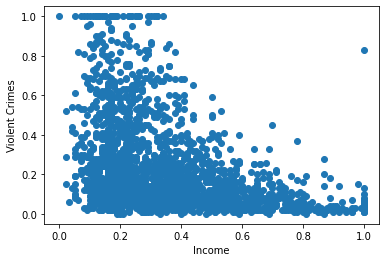

In [6]:

plt.scatter(col_data["medIncome"],col_data["ViolentCrimesPerPop"]) #to visualize data using scatter plot of the 2 columns of data frame
plt.xlabel("Income")
plt.ylabel("Violent Crimes")
plt.show()


6.Have a go at comparing other columns to crimes. You might want to select some columns and calculate correlation coefficients and draw scatterplots in a loop

In [7]:
cen_data.columns #to get the all column names of a data frame

Index(['communityname', 'fold', 'population', 'householdsize', 'racepctblack',
       'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21',
       'agePct12t29',
       ...
       'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
       'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens',
       'PctUsePubTrans', 'ViolentCrimesPerPop'],
      dtype='object', length=102)

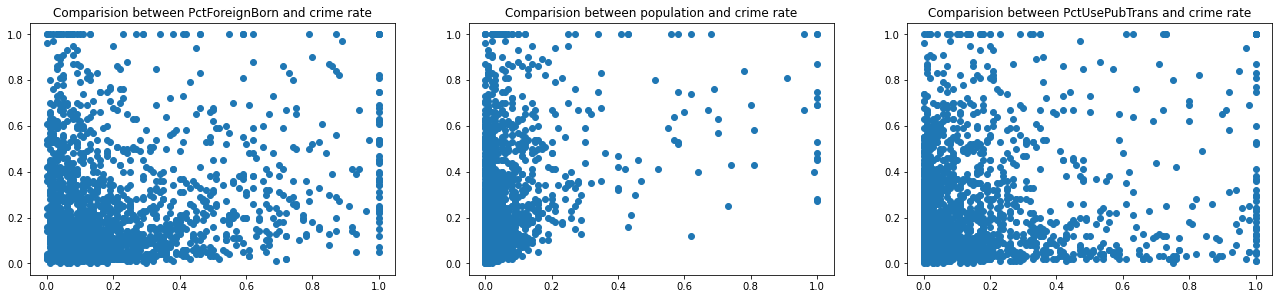

In [8]:
fig = plt.figure()
col_names = ["PctForeignBorn","population","PctUsePubTrans"]
spearman_corr_data = []
pearsonr_corr_data = []
new_cen_data = []
index_val = 1
for val in cen_data[col_names]:
    s_corr_data = spearmanr(cen_data[val],cen_data["ViolentCrimesPerPop"])
    p_corr_data = pearsonr(cen_data[val],cen_data["ViolentCrimesPerPop"])
    spearman_corr_data.append(s_corr_data)
    pearsonr_corr_data.append(p_corr_data) 
    ax1 = fig.add_subplot(1,len(col_names),index_val)
    ax1.scatter(cen_data[val],cen_data["ViolentCrimesPerPop"])
    ax1.set_title(f"Comparision between {val} and crime rate")
    index_val= index_val+1
    row_data = [val,"ViolentCrimesPerPop",s_corr_data,p_corr_data]
    new_cen_data.append(row_data)

plt.subplots_adjust(right = 3,top = 1)        
plt.show()
df_row_data = pd.DataFrame(np.array(new_cen_data),columns = ["Col 1","Col 2","Spearman correlation","Pearson correlation"])

In [9]:
df_row_data

,Col 1,Col 2,Spearman correlation,Pearson correlation
0,PctForeignBorn,ViolentCrimesPerPop,"(0.0872333411427476, 9.606098335928236e-05)","(0.1943904371300953, 1.9771210800753274e-18)"
1,population,ViolentCrimesPerPop,"(0.37235112478768917, 1.3219497859914124e-66)","(0.3671573782735258, 1.1266176363056112e-64)"
2,PctUsePubTrans,ViolentCrimesPerPop,"(0.03258548360121826, 0.14579293618800684)","(0.1538288467390043, 4.987116208172867e-12)"


<h1>  Significance testing </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import numpy as np
from scipy import stats
import math

1.Load the data into a pandas dataframe and create additional columns. Create gender and hasHeartDisease columns with the correct values (as above) to make it easier to read.

In [2]:
heart_data = pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_data["gender"] = heart_data["sex"].replace([1,0], ['male', 'female'])
heart_data["hasHeartDisease"] = heart_data["target"].replace([1,0], ['No', 'Yes'])

In [4]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,hasHeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,male,No
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,male,No
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,female,No
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,male,No
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,female,Yes
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,male,Yes
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,male,Yes
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,male,Yes


To visualize the relations among variables with the patients having / not having heart disease

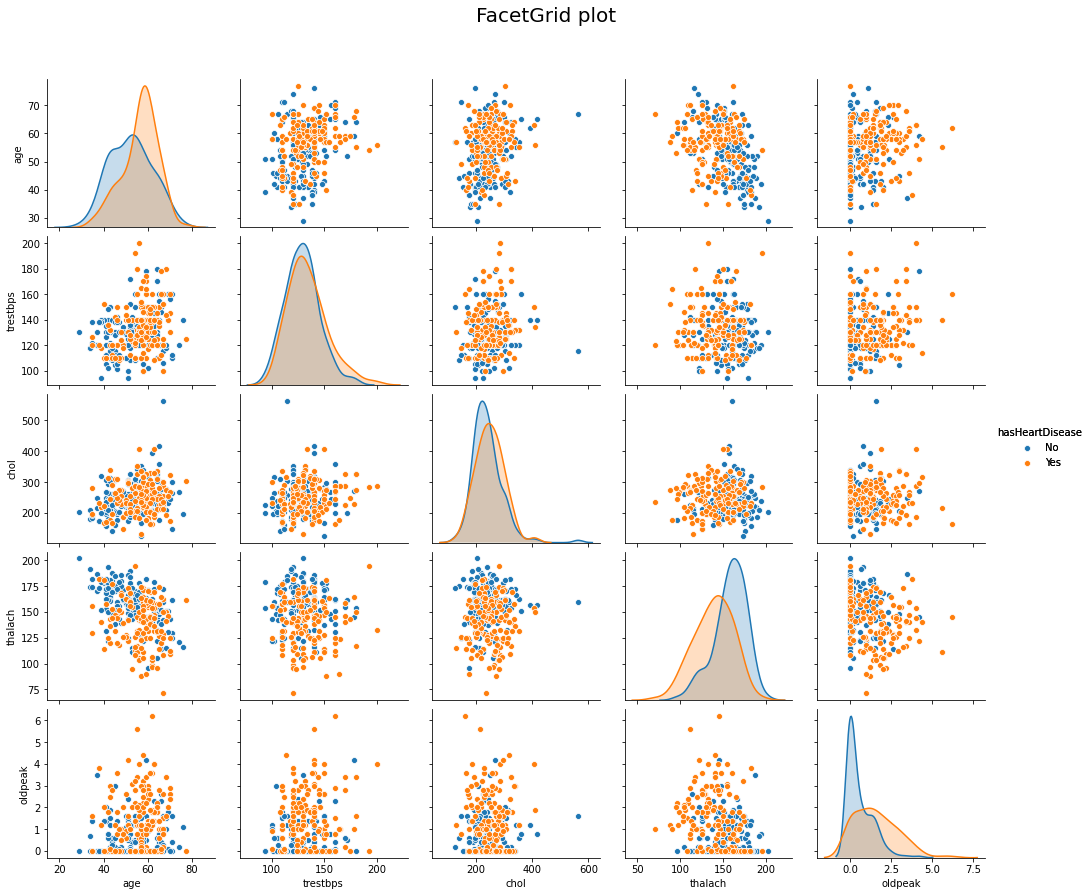

In [5]:
import seaborn as sns 
g = sns.pairplot(heart_data, vars =['age', 'trestbps', 'chol', 'thalach', 'oldpeak' ], hue = 'hasHeartDisease')
#g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9)

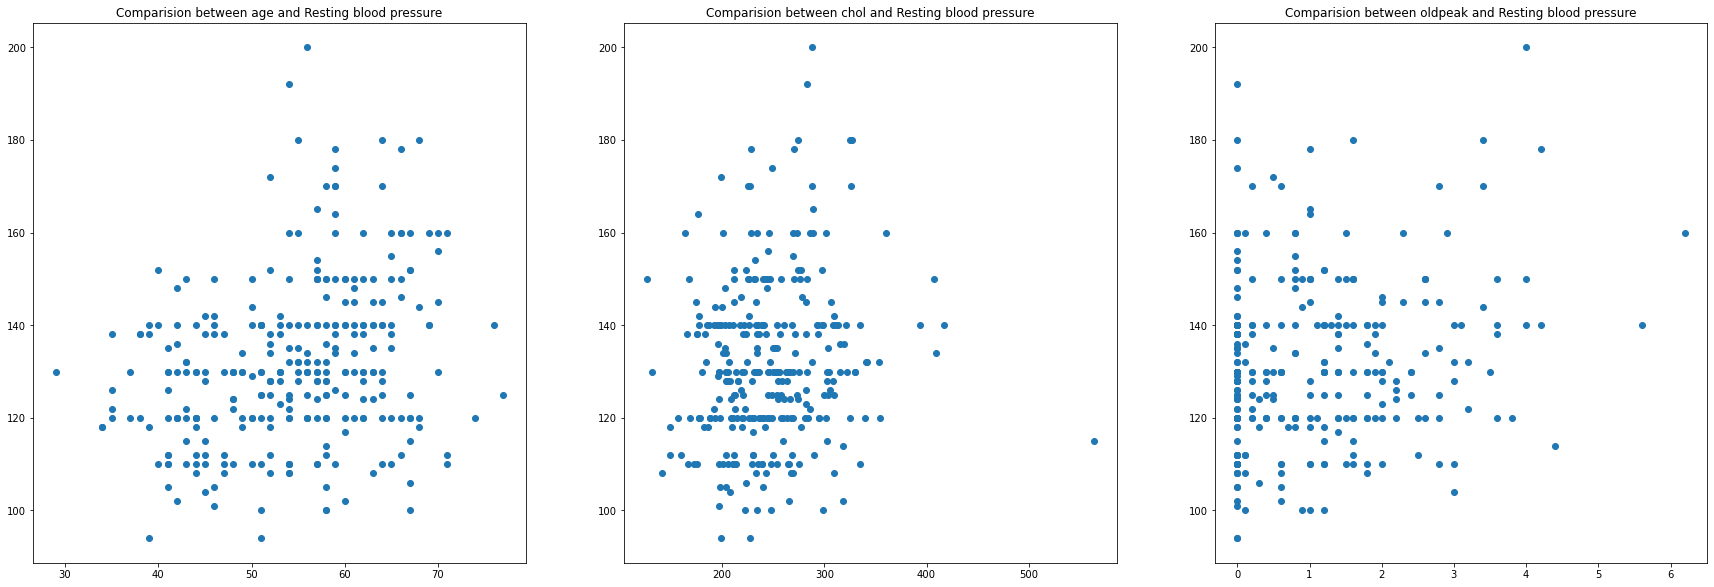

In [6]:
#visualization using matplotlib

fig = plt.figure()
col_names = ["age","chol","oldpeak"]
index_val = 1
for val in col_names:
    ax1 = fig.add_subplot(1,len(col_names),index_val)
    ax1.scatter(heart_data[val],heart_data["trestbps"])
    ax1.set_title(f"Comparision between {val} and Resting blood pressure")
    index_val= index_val+1

plt.subplots_adjust(right = 4,top = 2)        
plt.show()


Finding correlation between Resting blood pressure and the patient having heart disease

No handles with labels found to put in legend.


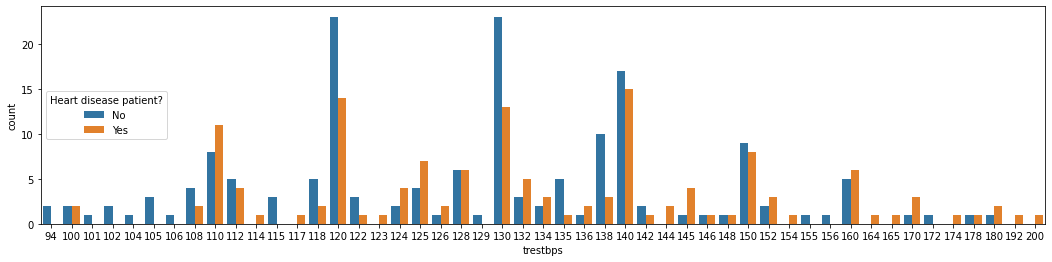

In [7]:
plt.figure(figsize=(18,4))
plt.legend(loc='upper left')
g = sns.countplot(data = heart_data, x = 'trestbps', hue = 'hasHeartDisease')
g.legend(title = 'Heart disease patient?', loc='center left')

#from graph it can be seen that more number of patients having heart disease has high resting blood pressure.

1.Calculate the means and standard deviations.

In [8]:
mean_data = heart_data.groupby(['gender','hasHeartDisease']).mean()#mean for female patients with heart disease
female_with_heart_dis = mean_data.loc[("female","Yes")]
female_with_heart_dis

age          59.041667
sex           0.000000
cp            0.166667
trestbps    146.125000
chol        274.958333
fbs           0.250000
restecg       0.541667
thalach     142.416667
exang         0.583333
oldpeak       1.841667
slope         0.958333
ca            1.291667
thal          2.500000
target        0.000000
Name: (female, Yes), dtype: float64

In [9]:
mean_data = heart_data.groupby(['gender','hasHeartDisease']).mean()#mean for female patients without heart disease
female_without_heart_dis = mean_data.loc[("female","No")]
female_without_heart_dis

age          54.555556
sex           0.000000
cp            1.333333
trestbps    128.736111
chol        256.750000
fbs           0.083333
restecg       0.583333
thalach     154.027778
exang         0.111111
oldpeak       0.554167
slope         1.583333
ca            0.305556
thal          2.000000
target        1.000000
Name: (female, No), dtype: float64

In [10]:
std_data = heart_data.groupby(['gender','hasHeartDisease']).std()#standard deviation for female patients with heart disease
std_fmale_w_heart_dis = std_data.loc[("female","Yes")]
std_fmale_w_heart_dis

age          4.964913
sex          0.000000
cp           0.481543
trestbps    21.436078
chol        60.863696
fbs          0.442326
restecg      0.658005
thalach     20.256865
exang        0.503610
oldpeak      1.608379
slope        0.464306
ca           1.160179
thal         0.589768
target       0.000000
Name: (female, Yes), dtype: float64

In [11]:
std_data = heart_data.groupby(['gender','hasHeartDisease']).std()#standard deviation for female patients without heart disease
std_fmale_wc_heart_dis = std_data.loc[("female","No")]
std_fmale_wc_heart_dis

age         10.265337
sex          0.000000
cp           0.919277
trestbps    16.536765
chol        66.216195
fbs          0.278325
restecg      0.524069
thalach     19.252929
exang        0.316475
oldpeak      0.647843
slope        0.550288
ca           0.596678
thal         0.290701
target       0.000000
Name: (female, No), dtype: float64

Comapring the standard deviation for female patients with and without heart disease , it can be seen that since the std for female without heart disease for resting blood pressure is less (i.e -  trestbps    16.536765) as comapred to with heart disease . so the values are closer to the mean value. Thus less number of females suffer from resting blood pressure who does not have heart disease.The difference between the number of patients having blood pressure with and without heart disease is moderately less for females. 

In [12]:
mean_data = heart_data.groupby(['gender','hasHeartDisease']).mean()
male_with_heart_dis = mean_data.loc[("male","Yes")]
male_with_heart_dis

age          56.087719
sex           1.000000
cp            0.543860
trestbps    131.929825
chol        246.061404
fbs           0.140351
restecg       0.429825
thalach     138.403509
exang         0.543860
oldpeak       1.531579
slope         1.210526
ca            1.140351
thal          2.552632
target        0.000000
Name: (male, Yes), dtype: float64

In [13]:
mean_data = heart_data.groupby(['gender','hasHeartDisease']).mean()
male_without_heart_dis = mean_data.loc[("male","No")]
male_without_heart_dis

age          50.903226
sex           1.000000
cp            1.408602
trestbps    129.741935
chol        230.989247
fbs           0.182796
restecg       0.602151
thalach     161.903226
exang         0.161290
oldpeak       0.605376
slope         1.602151
ca            0.408602
thal          2.215054
target        1.000000
Name: (male, No), dtype: float64

In [14]:
std_data = heart_data.groupby(['gender','hasHeartDisease']).std()
std_male_w_heart_dis = std_data.loc[("male","Yes")]
std_male_w_heart_dis

age          8.385155
sex          0.000000
cp           0.960645
trestbps    17.217361
chol        45.439113
fbs          0.348884
restecg      0.514726
thalach     23.083043
exang        0.500272
oldpeak      1.227438
slope        0.571811
ca           1.020820
thal         0.705128
target       0.000000
Name: (male, Yes), dtype: float64

In [15]:
std_data = heart_data.groupby(['gender','hasHeartDisease']).std()
std_male_wc_heart_dis = std_data.loc[("male","No")]
std_male_wc_heart_dis

age          8.682897
sex          0.000000
cp           0.980645
trestbps    15.955715
chol        37.893011
fbs          0.388594
restecg      0.492107
thalach     18.492104
exang        0.369792
oldpeak      0.872573
slope        0.627967
ca           1.002568
thal         0.548703
target       0.000000
Name: (male, No), dtype: float64

Comapring the standard deviation for male patients with and without heart disease , it can be seen that since the std for males without heart disease for resting blood pressure is less (i.e -  trestbps   15.955715) as comapred to with heart disease (trestbps    17.217361) . so the values are more closer to the mean value. Thus less number of males suffer from resting blood pressure who does not have heart disease.The difference between the number of patients suffering from blood pressure with and without heart disease is although very less.

Create boxplots and histograms to compare the means and distributions. Make sure you use the same scales on the axes. 

Box plot to view mean and std for all column values graphically and notice their behaviour

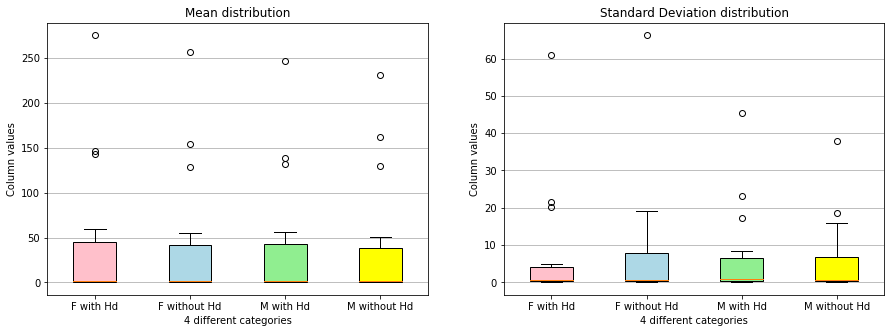

In [16]:
labels = ['F with Hd', 'F without Hd', 'M with Hd','M without Hd']
all_mean_data = [mean_data for mean_data in [female_with_heart_dis,female_without_heart_dis,male_with_heart_dis,male_without_heart_dis]]
all_std_data = [std_data for std_data in [std_fmale_w_heart_dis,std_fmale_wc_heart_dis,std_male_w_heart_dis,std_male_wc_heart_dis]]
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
bplot1 = ax1.boxplot(all_mean_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Mean distribution')

bplot2 = ax2.boxplot(all_std_data, vert=True, patch_artist=True,labels=labels)
ax2.set_title('Standard Deviation distribution')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen','yellow']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('4 different categories')
    ax.set_ylabel('Column values')

plt.show()       

Histogram to view mean and std for all column values graphically and notice their behaviour

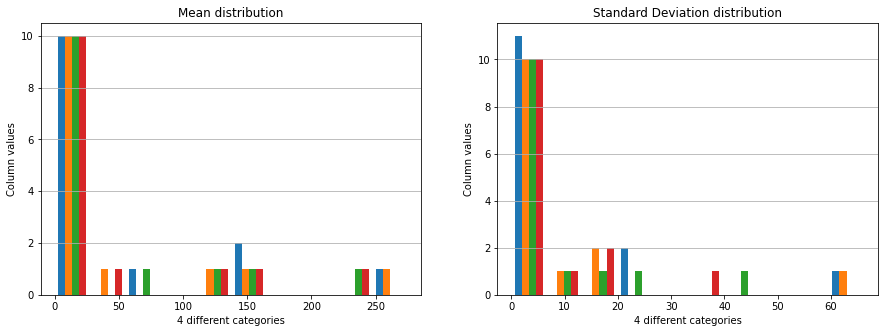

In [17]:
labels = ['F with Hd', 'F without Hd', 'M with Hd','M without Hd']
all_mean_data = [mean_data for mean_data in [female_with_heart_dis,female_without_heart_dis,male_with_heart_dis,male_without_heart_dis]]
all_std_data = [std_data for std_data in [std_fmale_w_heart_dis,std_fmale_wc_heart_dis,std_male_w_heart_dis,std_male_wc_heart_dis]]
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
bplot1 = ax1.hist(all_mean_data)  # will be used to label x-ticks
ax1.set_title('Mean distribution')

bplot2 = ax2.hist(all_std_data)
ax2.set_title('Standard Deviation distribution')

# fill with colors

        
# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('4 different categories')
    ax.set_ylabel('Column values')

plt.show()

Box plot for viewing statistical distribution for resting blood pressure for patients having heart disease and those without heart disease gender wise

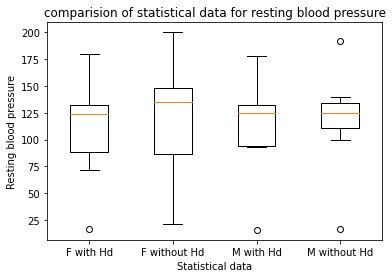

In [18]:
stas_data = heart_data.groupby(['gender','hasHeartDisease']).describe()["trestbps"]
labels = ['F with Hd', 'F without Hd', 'M with Hd','M without Hd']
plt.boxplot(stas_data,labels=labels)
plt.xlabel("Statistical data")
plt.ylabel("Resting blood pressure")
plt.title("comparision of statistical data for resting blood pressure")
plt.show()
                     

Histogram for viewing statistical distribution for resting blood pressure for patients having heart disease and those without heart disease gender wise

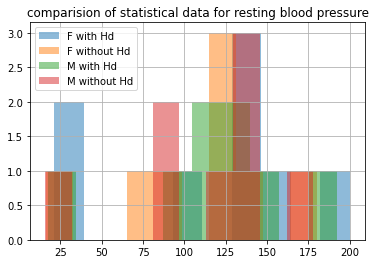

In [19]:
stas_data.loc[("female","Yes")].hist(alpha=0.5)
stas_data.loc[("female","No")].hist(alpha=0.5)
stas_data.loc[("male","Yes")].hist(alpha=0.5)
stas_data.loc[("male","No")].hist(alpha=0.5)
plt.legend(['F with Hd', 'F without Hd', 'M with Hd','M without Hd'])
plt.title("comparision of statistical data for resting blood pressure")
plt.show()

# plt.hist(stas_data,labels=labels)
# labels = ['F with Hd', 'F without Hd', 'M with Hd','M without Hd']
# plt.xlabel("Statistical data")
# plt.ylabel("Resting blood pressure")
# plt.title("comparision of statistical data for resting blood pressure")
# plt.show()

After interpreting from the graphs it can be seen that there are more chances for patients (males/females) to suffer with other diseases like resting blood pressure if they already have a heart disease.

Compare the means using scipy.stat's ttest

In [20]:
stas_data

count        mean        std    min    25%    50%  \
gender hasHeartDisease                                                      
female No                72.0  128.736111  16.536765   94.0  119.5  130.0   
       Yes               24.0  146.125000  21.436078  108.0  130.0  140.0   
male   No                93.0  129.741935  15.955715   94.0  120.0  130.0   
       Yes              114.0  131.929825  17.217361  100.0  120.0  130.0   

                          75%    max  
gender hasHeartDisease                
female No               140.0  180.0  
       Yes              152.5  200.0  
male   No               140.0  178.0  
       Yes              140.0  192.0

In [21]:
#data for patients with heart disease
f1 = stas_data.loc[("female","Yes")][1]        #to get mean for female patients 
f1_size = stas_data.loc[("female","Yes")][0]   #to get count for female patients
f1var = stas_data.loc[("female","Yes")][2]**2  #to get variance for female patients

#data for patients without heart disease
f2 = stas_data.loc[("female","No")][1]        #to get mean for female patients
f2_size = stas_data.loc[("female","No")][0]   #to get count for female patients
f2var = stas_data.loc[("female","No")][2]**2  #to get variance for female patients
print(f"mean for females with heart disease: {f1}, count for females with heart disease: {f1_size}, variance for females with heart disease:{f1var},mean for females without heart disease: {f2},count for females without heart disease: {f2_size},variance for females without heart disease: {f2var}")

mean for females with heart disease: 146.125, count for females with heart disease: 24.0, variance for females with heart disease:459.50543478260875,mean for females without heart disease: 128.73611111111111,count for females without heart disease: 72.0,variance for females without heart disease: 273.46459311424087


The T-test for the means of two independent samples of scores.

In [22]:
t1, p1 = stats.ttest_ind_from_stats(f1, np.sqrt(f1var), f1_size,
                              f2, np.sqrt(f2var), f2_size,
                              equal_var=True)
print(f" T value : {t1},pvalue : {p1}")

 T value : 4.130691885476511,pvalue : 7.837377824823497e-05


As the pvalue is larger than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores.  

In [23]:
m1 = stas_data.loc[("male","Yes")][1]
m1_size = stas_data.loc[("male","Yes")][0]
m1var = stas_data.loc[("male","Yes")][2]**2
m2 = stas_data.loc[("male","No")][1]
m2_size = stas_data.loc[("male","No")][0]
m2var = stas_data.loc[("male","No")][2]**2
print(f"mean for males with heart disease: {m1}, count for males with heart disease: {m1_size}, variance for males with heart disease:{m1var},mean for males without heart disease: {m2},count for males without heart disease: {m2_size},variance for males without heart disease: {m2var}")

mean for males with heart disease: 131.9298245614035, count for males with heart disease: 114.0, variance for males with heart disease:296.4375097034621,mean for males without heart disease: 129.74193548387098,count for males without heart disease: 93.0,variance for males without heart disease: 254.58485273492298


In [24]:
t1, p1 = stats.ttest_ind_from_stats(m1, np.sqrt(m1var), m1_size,
                              m2, np.sqrt(m2var), m2_size,
                              equal_var=True)
print(f" T value : {t1},pvalue : {p1}")

 T value : 0.9396830483284377,pvalue : 0.3484860467059646


As the pvalue is larger than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores. 

Calculate Cohen's d for resting blood pressure for patents with and without heart disease.

In [25]:
f_pooled_std = np.sqrt(((f1_size - 1)*pow(f1var,2) + (f2_size - 1) *pow(f2var,2)) / (f1_size + f2_size - 2))
f_cohen_d = (f1 - f2) / f_pooled_std
print(f" Cohen's d for females with heart disease and females without heart diseas is : {f_cohen_d}" )

 Cohen's d for females with heart disease and females without heart diseas is : 0.05287645131212989


In [26]:
m_pooled_std = np.sqrt((((m1_size - 1)*pow(m1var,2)) + ((m2_size - 1) *pow(m2var,2))) / (m1_size + m2_size - 2))
m_cohen_d = (m1 - m2) / m_pooled_std
print(f" Cohen's d for males with heart disease and males without heart diseas is : {m_cohen_d}" )

 Cohen's d for males with heart disease and males without heart diseas is : 0.007857835224805492


Null Hypothesis Statistical Testing (NHST).Here, we are going to test if the population proportion of females with heart disease is different from the population proportion of males with heart disease.

Step 1: Set up the null hypothesis, alternative hypothesis, and significance level.

Here, we want to check if there is any difference between the population proportion of males and females having heart disease. We will start with the assumption that there is no difference.
Ho: p1 -p2 = 0
This is our null hypothesis. Here, p1 is the population proportion of females with heart disease and p2 is the population proportion of males having heart disease.

What could be the alternative hypothesis?

The alternative hypothesis can be, there is a difference.

Ha: p1 - p2 != 0

Step 2: Prepare a chart that shows the population proportion of males and females with heart disease and the total male and female population.

In [27]:
#Count the number with the disease for each gender type
hasDiseaseCount=heart_data[heart_data.hasHeartDisease=="Yes"].groupby("gender").count().hasHeartDisease

#Count the number of gender type
totalCount=heart_data.groupby("gender").count()['hasHeartDisease']

#combine into a dataframe (both are indexed with gender, so will be matched) and specify the columns
#p = total population with heart disease
p=pd.concat([hasDiseaseCount, totalCount], axis=1)
p.columns = ["heartDiseaseCount", "totalCount"]

#create a new column and calculate the proportion
p['propHeartDisease']=p["heartDiseaseCount"]/p["totalCount"]

#print the results
print(p.head())

        heartDiseaseCount  totalCount  propHeartDisease
gender                                                 
female                 24          96          0.250000
male                  114         207          0.550725


Step 3: Calculate the test statistic. We will use the same formula for the test statistic as before. The best estimate is p1 — p2. Here, p1 is the population proportion of females with heart disease and p2 is the population proportion of males with heart disease.

In [28]:
#Best estimate is p1 - p2. Get p1 and p2 from the chart p above
p_fe = p.loc["female","propHeartDisease"]
p_male = p.loc["male","propHeartDisease"]

In [29]:
p_us = len(heart_data[heart_data['hasHeartDisease']=='Yes'])/len(heart_data)
p_us

0.45544554455445546

In [30]:
#n1 and n2 are the total numbers of the female and male populations in the sample.
n1 = p.loc["female","totalCount"]
n2 = p.loc["male","totalCount"]

#The standard error for two population proportion is calculated with the formula below:
se = np.sqrt(p_us*(1-p_us)*(1/n1 + 1/n2))
n1,n2,se

(96, 207, 0.06149494420532701)

Now, use this standard error and calculate the test statistic.

In [31]:
#calculate the best estimate
be = p_fe - p_male  #Calculate the hypothesized estimate
#Our null hypothesis is p1 - p2 = 0 he = 0  #Calculate the test statistic
he = 0 
test_statistic = (be - he)/se
be , test_statistic

(-0.3007246376811594, -4.890233523540771)

The calculated test_statistic is -1463.534948490997. That means that the observed difference in sample proportions is 1463.534948490997 estimated standard error below the hypothesized value.

Step 4: Calculate the p-value

In [32]:
pvalue = 2*stats.distributions.norm.cdf(-np.abs(test_statistic))
pvalue

1.0071642033238867e-06

The p-value is 1.0071642033238867e-06. 
In another way, the p-value is less than the significance level (0.1). So, we do have enough evidence to reject the null hypothesis.
